<a href="https://colab.research.google.com/github/mlkbrv/MachineLearningPorjects/blob/main/Boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/mushrooms.csv")

In [ ]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


<Axes: xlabel='class', ylabel='count'>

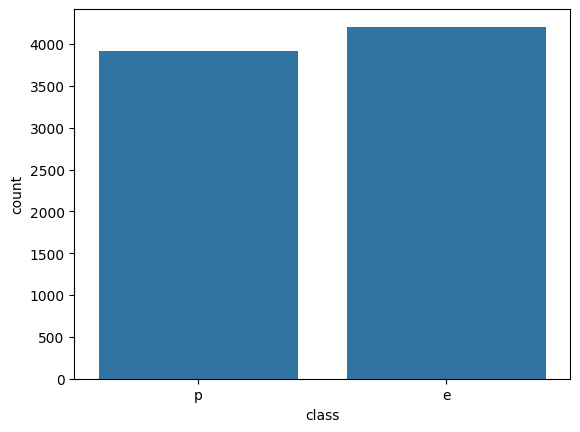

In [ ]:
sns.countplot(data=df,x="class")

In [ ]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [ ]:
feat_uni = df.describe().transpose().reset_index().sort_values("unique")

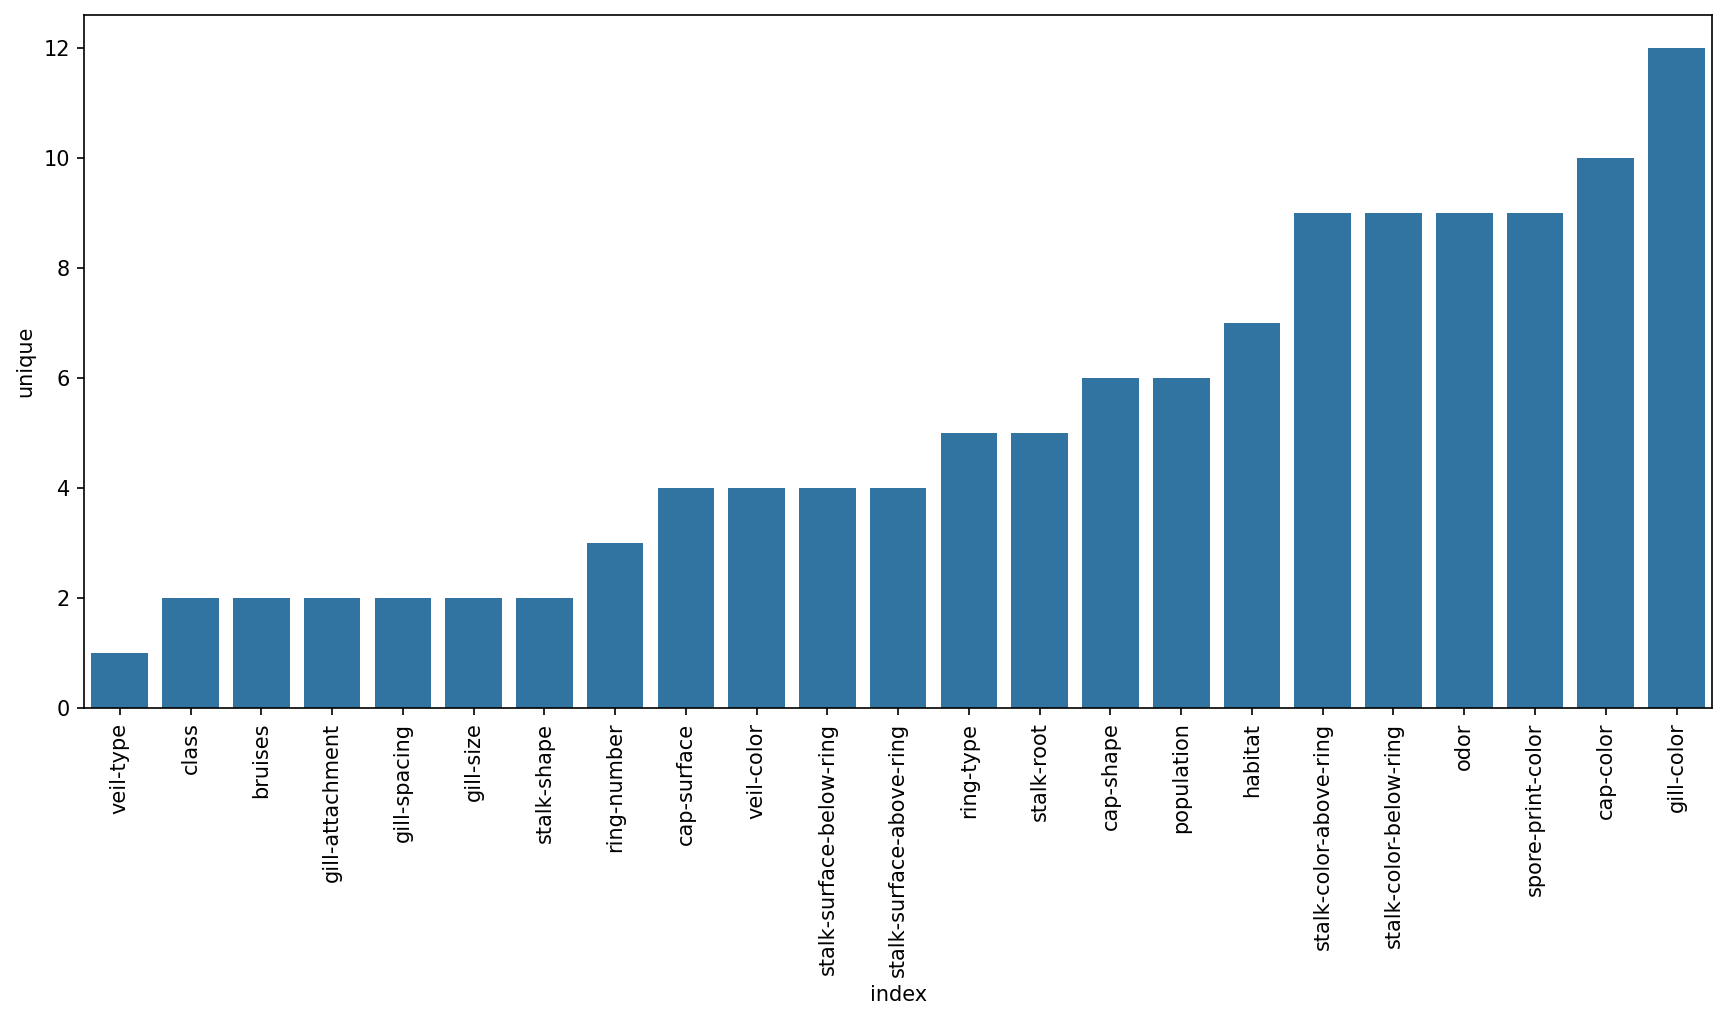

In [ ]:
plt.figure(figsize=(14,6),dpi=150)
sns.barplot(data=feat_uni,x="index",y="unique")
plt.xticks(rotation=90);

In [ ]:
X =df.drop("class",axis=1)

In [ ]:
y= df["class"]

In [ ]:
X=pd.get_dummies(X,drop_first=True)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15,random_state=101)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
model = AdaBoostClassifier(n_estimators=1)

In [ ]:
model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=1)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay,classification_report,accuracy_score

In [ ]:
predictions = model.predict(X_test)

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           e       0.96      0.81      0.88       655
           p       0.81      0.96      0.88       564

    accuracy                           0.88      1219
   macro avg       0.88      0.88      0.88      1219
weighted avg       0.89      0.88      0.88      1219



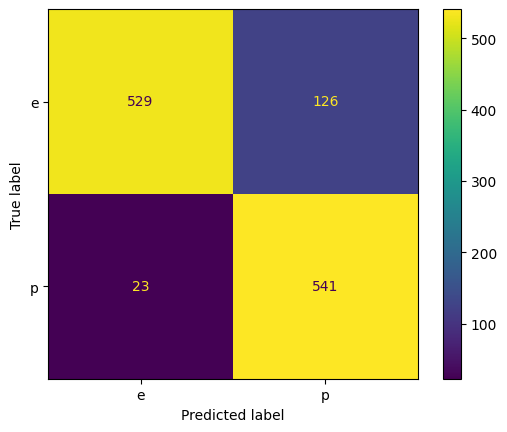

In [ ]:
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test)

In [ ]:
model.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
model.feature_importances_.argmax()

np.int64(22)

In [ ]:
X.columns[22]

'odor_n'

<Axes: xlabel='odor', ylabel='count'>

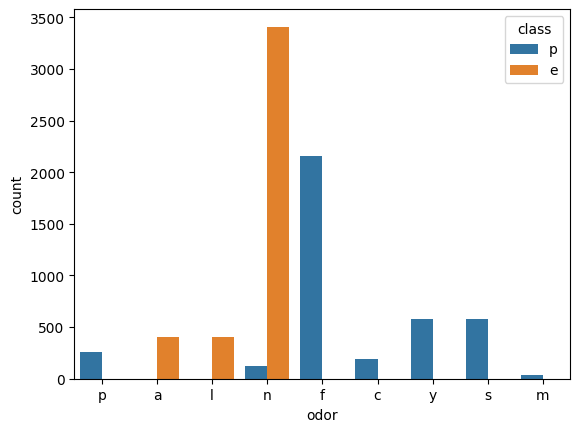

In [ ]:
sns.countplot(data=df,x="odor",hue="class")

In [ ]:
error_rates = []
for n in range(1,len(X.columns)+1):
  model = AdaBoostClassifier(n_estimators=n)
  model.fit(X_train,y_train)
  preds = model.predict(X_test)
  err = 1- accuracy_score(y_test,preds)
  error_rates.append(err)

Text(0, 0.5, 'Error Rate')

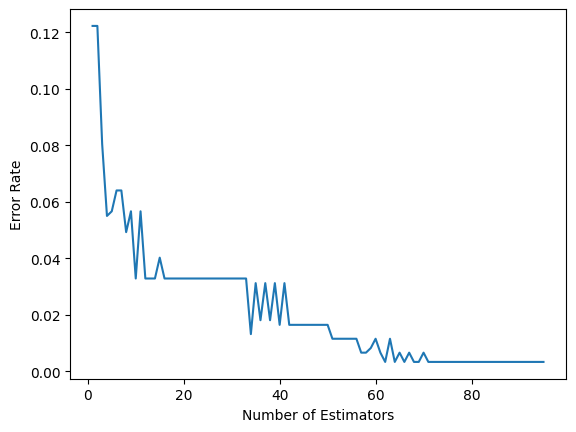

In [ ]:
plt.plot(range(1,len(X.columns)+1),error_rates)
plt.xlabel("Number of Estimators")
plt.ylabel("Error Rate")

In [ ]:
model.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.08758134, 0.15483051,
       0.03297374, 0.        , 0.07596867, 0.08553577, 0.        ,
       0.        , 0.        , 0.01449336, 0.04761456, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.02261282, 0.        , 0.01960917, 0.        , 0.        ,
       0.04145947, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.03716765, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.02345876, 0.        , 0.     